<a href="https://colab.research.google.com/github/wilianuchasara/Data_Mining/blob/main/Examen_Data_Mining_Clustering_Onehot_Grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LIBRERIAS BASICAS

from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

In [3]:
# FUNCIONES PARA CLUSTERING

def normalize(df):
    dfb = df.copy()
    for x in df.columns:
        dfb[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())
    return dfb   
    
def centroides(a,b):
    res = pd.DataFrame(data=b)
    i=0
    for x in a.columns:
        res.rename(columns={i:x},inplace=True)
        i = i+1
    res.reset_index(inplace=True)
    res.rename(columns={'index':'cluster'},inplace=True)
    return res 
    
def clusteres(a,b): 
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)  
    return ax

def elbow(X):
    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        k_means = KMeans(n_clusters=k)
        model = k_means.fit(X)
        sum_of_squared_distances.append(k_means.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    plt.show()
    return sum_of_squared_distances

def silhouette(X):
    sil = []
    K = range(2, 15)
    for k in K:
      kmeans = KMeans(n_clusters = k).fit(X)
      labels = kmeans.labels_
      sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    plt.plot(K, sil, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title('silhouette method for optimal k')
    plt.show()
    return sil

In [4]:
#DATA LOADING & PREVIEW

url = 'https://raw.githubusercontent.com/wilianuchasara/Data_Mining/main/Grupo%203_Data_Mining.csv'
df = pd.read_csv(url,sep=',')
df.head()

,CustomerID,Frequency,Monetary_value,Average_price,Recency,Country
0,12347,7,44.048571,1.741523,2,Others
1,12348,1,201.360000,0.524375,358,Others
2,12349,1,178.570000,3.799362,18,Others
3,12350,1,25.200000,2.100000,310,Others
4,12352,5,37.130000,4.722286,80,Others


In [5]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

X = df.drop(columns='CustomerID')
X = pd.get_dummies(X)               #ONE HOT ENCODING SI HAY CATEGORICAS
X = normalize(X)
X.head()

,Frequency,Monetary_value,Average_price,Recency,Country_Others,Country_United Kingdom
0,0.033149,0.021448,0.000837,0.005362,1.0,0.0
1,0.000000,0.025402,0.000238,0.959786,1.0,0.0
2,0.000000,0.024829,0.001849,0.048257,1.0,0.0
3,0.000000,0.020974,0.001013,0.831099,1.0,0.0
4,0.022099,0.021274,0.002303,0.214477,1.0,0.0


In [6]:
X = X.drop(columns='Country_Others')
X.head()

,Frequency,Monetary_value,Average_price,Recency,Country_United Kingdom
0,0.033149,0.021448,0.000837,0.005362,0.0
1,0.000000,0.025402,0.000238,0.959786,0.0
2,0.000000,0.024829,0.001849,0.048257,0.0
3,0.000000,0.020974,0.001013,0.831099,0.0
4,0.022099,0.021274,0.002303,0.214477,0.0


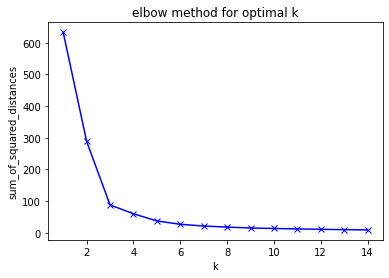

[632.9742697503925, 288.74885503803006, 88.02637267835685, 60.18173263265723, 37.443966371152044, 26.9302946083616, 21.426175570163537, 18.06843579116958, 15.193406077889305, 13.669085721314412, 12.304907867495086, 11.116186148866886, 9.902545482337667, 9.14422944958439]


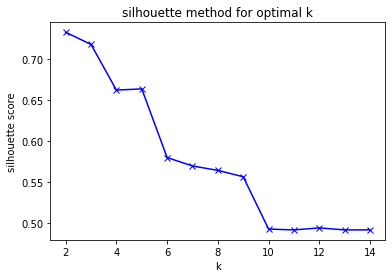

[0.7332223047004726, 0.7182767487972149, 0.6624089612785917, 0.6638816858511116, 0.5798390327852314, 0.5694923733113461, 0.5641384740170576, 0.5562844820524667, 0.4922963559290399, 0.4912462396999404, 0.49371157035603397, 0.49123856003114774, 0.4913037221053871]


In [7]:
# OPTIMAL NUMBER "K" OF CLUSTERS

print(elbow(X))
print(silhouette(X))

In [10]:
# ALGORITHM FIT

kmeans = KMeans(n_clusters=3, random_state=300).fit(X)

In [11]:
# EXPORT RESULTS
centroides(X,kmeans.cluster_centers_).to_csv('centroides.csv') 
files.download('centroides.csv')

clusteres(df,kmeans.labels_).to_csv('resultados.csv') 
files.download('resultados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>